# Final Project

## The Best Neighborhood in Pittsburgh

### John R. Lovre (JRL142) - Group 32

Metric: Number of Parking Meters

dataset: https://data.wprdc.org/dataset/parking-meters-pittsburgh-parking-authority/resource/72fff5c4-5ef2-4437-9e40-e2d999d455ed

The number of parking meters in a neighborhood is a metric used to determine the availability of on-site public parking.

In [11]:
# import dataset
import pandas as pd
meters = pd.read_csv("parking_meters.csv")
meters

,_id,x,y,objectid,terminal_id,node,location,lot,rate,maxhours,...,resttime1,resttime2,specialev,created_user,created_date,last_edited_user,last_edited_date,ratetimea,ratetimeb,rate2
0,2113,-79.922827,40.462490,225,301520-SHARVD0001,SHER-HAR-L,SHERIDAN HARVARD LOT,Lot,$1 Per Hour,4 Hours,...,,,No,NaN,NaN,NaN,NaN,,,
1,2114,-79.923530,40.462718,226,301521-SHARVD0002,SHER-HAR-L,SHERIDAN HARVARD LOT,Lot,$1 Per Hour,4 Hours,...,,,No,NaN,NaN,NaN,NaN,,,
2,2115,-79.923127,40.461796,227,302521-KIRKWD0001,SHER-KIR-L,SHERIDAN KIRKWOOD LOT,Lot,$1 Per Hour,4 Hours,...,,,No,NaN,NaN,NaN,NaN,,,
3,2116,-79.922689,40.461792,228,302522-KIRKWD0002,SHER-KIR-L,SHERIDAN KIRKWOOD LOT,Lot,$1 Per Hour,4 Hours,...,,,No,NaN,NaN,NaN,NaN,,,
4,2117,-79.922329,40.461512,229,302523-KIRKWD0003,SHER-KIR-L,SHERIDAN KIRKWOOD LOT,Lot,$1 Per Hour,4 Hours,...,,,No,NaN,NaN,NaN,NaN,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1086,3199,NaN,NaN,0,PBP423,WEST END,Virtual Terminal for ParkMobile,,,,...,,,,NaN,NaN,NaN,NaN,,,
1087,3200,NaN,NaN,0,PBP424,TECHNOLOGY,Virtual Terminal for ParkMobile,,,,...,,,,NaN,NaN,NaN,NaN,,,
1088,3201,NaN,NaN,0,PBP425,BAKERY-SQ,Virtual Terminal for ParkMobile,,,,...,,,,NaN,NaN,NaN,NaN,,,
1089,3202,NaN,NaN,0,PBP426,HILL-DIST,Virtual Terminal for ParkMobile,,,,...,,,,NaN,NaN,NaN,NaN,,,


### First list all neighborhoods within the dataset

In [12]:
all_nodes = meters['node'].drop_duplicates()
print(all_nodes.to_string())

0                           SHER-HAR-L
2                           SHER-KIR-L
5                           TAME-BEA-L
7                           EVA-BEAT-L
9                           ANSL-BEA-L
10                          PENNC.NW-L
12                          BEAC-BAR-L
15                          FORB-SHA-L
18                          DOUG-PHI-L
20                          FORB-MUR-L
23                               JCC-L
25                          IVY-BELL-L
30                          HOME-ZEN-L
31                            TAYLOR-L
32                          FRIE-CED-L
34                          5224BUTL-L
35                          42-BUTLE-L
36                          18-SIDNE-L
38                          EASTCARS-L
40                          19-CARSO-L
41                          18-CARSO-L
43                          20-SIDNE-L
45                          BROW-SAN-L
47                          WALT-WAR-L
48                          ASTE-WAR-L
49                       


### Notice that some neighborhoods have mulitple entries 
### (e.g. 19-CARSO, 18-CARSO and SQ.HILL1, SQ.HILL2); 
### combine items like this into one category by removing numbers from node name

In [13]:
numbers = '|'.join(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '0'])
condensed_nodes = all_nodes.str.replace(numbers, '', regex=True)
condensed_nodes = condensed_nodes.drop_duplicates()
print(condensed_nodes.to_string(), str('\ntotal:'), condensed_nodes.count())

0                           SHER-HAR-L
2                           SHER-KIR-L
5                           TAME-BEA-L
7                           EVA-BEAT-L
9                           ANSL-BEA-L
10                          PENNC.NW-L
12                          BEAC-BAR-L
15                          FORB-SHA-L
18                          DOUG-PHI-L
20                          FORB-MUR-L
23                               JCC-L
25                          IVY-BELL-L
30                          HOME-ZEN-L
31                            TAYLOR-L
32                          FRIE-CED-L
34                              BUTL-L
35                            -BUTLE-L
36                            -SIDNE-L
38                          EASTCARS-L
40                            -CARSO-L
45                          BROW-SAN-L
47                          WALT-WAR-L
48                          ASTE-WAR-L
49                          BROOKLIN-L
50                          BEECHVIE-L
51                       

### Now we know we have a set of 56 neighborhoods to rank;

### go back to original dataset and update nodes to remove numbers from name

In [14]:
meters['node'] = meters['node'].str.replace(numbers, '', regex=True)
#print(meters['node'].drop_duplicates().to_string())

### Sort neighborhoods by number of parking meters

In [36]:
meters_by_node = meters.groupby('node')
meter_count = meters_by_node['node'].count()
meter_listing = meter_count.sort_values(ascending=False)
print(meter_listing)

node
OAKLAND                           177
SOUTHSIDE                         102
DOWNTOWN                          100
NORTHSIDE                          92
BLOOMFIELD                         69
UPTOWN                             63
EASTLIB                            58
SQ.HILL                            57
SHADYSIDE                          54
STRIPDIST                          52
NORTHSHORE                         39
LAWRENCEV                          30
BROOKLINE                          22
MT.WASH                            18
HILL-DIST-                         10
CARRICK                            10
BEECHVIEW                           9
KNOXVILLE                           7
WEST END                            7
TECHNOLOGY                          6
-SIDNE-L                            6
IVY-BELL-L                          6
MELONPARK                           5
BAKERY-SQ                           5
-CARSO-L                            5
HILL-DIST                           5
SHER-KI

### Condense to top 20 listings

In [37]:
meter_head = meter_listing.head(20)
meter_head

node
OAKLAND       177
SOUTHSIDE     102
DOWNTOWN      100
NORTHSIDE      92
BLOOMFIELD     69
UPTOWN         63
EASTLIB        58
SQ.HILL        57
SHADYSIDE      54
STRIPDIST      52
NORTHSHORE     39
LAWRENCEV      30
BROOKLINE      22
MT.WASH        18
HILL-DIST-     10
CARRICK        10
BEECHVIEW       9
KNOXVILLE       7
WEST END        7
TECHNOLOGY      6
Name: node, dtype: int64

### Plot data on a visual graph

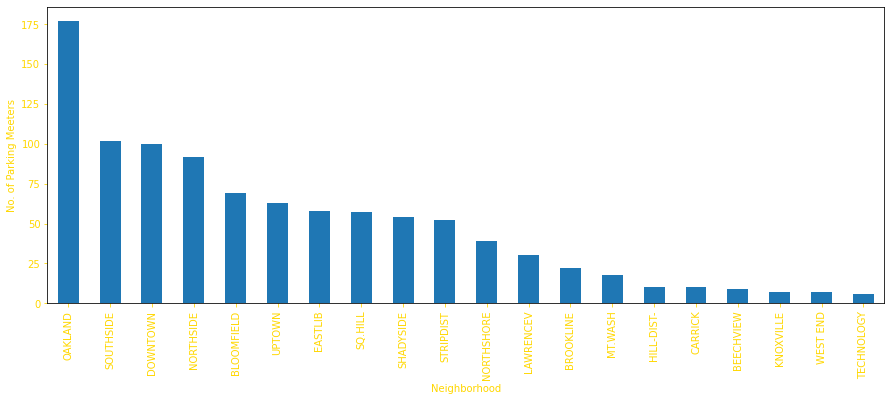

In [74]:
meter_listing = meter_listing.sort_values(ascending=True)
graph = meter_head.plot.bar(x="node", y="meter_listing", figsize=(15, meters.shape[0] * 0.005))
graph.set_ylabel("No. of Parking Meeters", color='gold')
graph.set_xlabel("Neighborhood", color='gold')
graph.tick_params(axis='x', colors='gold')
graph.tick_params(axis='y', colors='gold')
graph.get_figure().savefig('parking_meters.pdf')

## Result: 
#### Oakland is home to 177 parking meters, almost twice as many as the next 3 runners up, SouthSide, Downtown, and Northside, making it the most navigable neighborhood based on the availability of on-street public parking.

#### It would be be interesting to further explore this metric as the ratio of parking meters to either number of residents or square footage of the neighborhood. Not all neighborhoods are the same size or as densely populated so these results may be skewed.

#### Also, this metric just counts the number of parking meters. It does not take into account public parking lots, paid garages, or any other matter of parking. These factors could also skew the accessibilty of the parking metric.